# MILESTONE 1

IRFAN FAHMUDDIN FTDS-011

**PROSES QUERY DATA PADA GOOGLE CLOUD**

select limit_balance, sex, education_level, marital_status, age, pay_0, pay_2, pay_3, pay_4, pay_5, pay_6, bill_amt_1, bill_amt_2, bill_amt_3, bill_amt_4, bill_amt_5, bill_amt_6, pay_amt_1, pay_amt_2, pay_amt_3, pay_amt_4, pay_amt_5, pay_amt_6, default_payment_next_month

from `bigquery-public-data.ml_datasets.credit_card_default`
;

**OBJECTIVES**
Buatlah model Classification untuk memprediksi default_payment_next_month menggunakan dataset yang sudah disimpan

In [1]:
# import library yang digunakan

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

from feature_engine.outliers import Winsorizer

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, classification_report

In [2]:
df= pd.read_csv('data_ms1p1.csv')
df

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,50000.0,1,1,2,39.0,0.0,0.0,0.0,0.0,0,...,50803.0,30789.0,15874.0,1800.0,2000.0,3000.0,2000.0,2000.0,2000.0,0
1,110000.0,2,1,2,29.0,0.0,0.0,0.0,0.0,0,...,32489.0,26354.0,20221.0,2000.0,2010.0,3000.0,3000.0,3000.0,1000.0,0
2,270000.0,1,1,2,36.0,0.0,0.0,0.0,2.0,0,...,40335.0,37165.0,22156.0,10076.0,4018.0,14.0,2051.0,2000.0,0.0,0
3,130000.0,1,1,1,45.0,0.0,0.0,0.0,0.0,0,...,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0,0
4,50000.0,1,1,2,24.0,0.0,0.0,0.0,0.0,0,...,19837.0,19855.0,20151.0,1367.0,1606.0,692.0,709.0,721.0,692.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,210000.0,2,2,1,39.0,-1.0,-1.0,-1.0,-1.0,-2,...,0.0,0.0,12000.0,0.0,28428.0,0.0,0.0,12000.0,33664.0,0
2961,280000.0,2,1,1,41.0,2.0,-1.0,-1.0,-1.0,-2,...,0.0,0.0,244.0,6859.0,486.0,0.0,0.0,244.0,0.0,0
2962,80000.0,1,1,2,28.0,1.0,-1.0,-1.0,-1.0,-2,...,0.0,0.0,0.0,47.0,207.0,0.0,0.0,0.0,0.0,0
2963,200000.0,1,2,1,53.0,1.0,-1.0,-1.0,-2.0,-2,...,0.0,0.0,6753.0,2920.0,0.0,0.0,0.0,6753.0,0.0,1


In [3]:
# limit data menjadi 21956 data

df = df[0:21956]
df

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,50000.0,1,1,2,39.0,0.0,0.0,0.0,0.0,0,...,50803.0,30789.0,15874.0,1800.0,2000.0,3000.0,2000.0,2000.0,2000.0,0
1,110000.0,2,1,2,29.0,0.0,0.0,0.0,0.0,0,...,32489.0,26354.0,20221.0,2000.0,2010.0,3000.0,3000.0,3000.0,1000.0,0
2,270000.0,1,1,2,36.0,0.0,0.0,0.0,2.0,0,...,40335.0,37165.0,22156.0,10076.0,4018.0,14.0,2051.0,2000.0,0.0,0
3,130000.0,1,1,1,45.0,0.0,0.0,0.0,0.0,0,...,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0,0
4,50000.0,1,1,2,24.0,0.0,0.0,0.0,0.0,0,...,19837.0,19855.0,20151.0,1367.0,1606.0,692.0,709.0,721.0,692.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,210000.0,2,2,1,39.0,-1.0,-1.0,-1.0,-1.0,-2,...,0.0,0.0,12000.0,0.0,28428.0,0.0,0.0,12000.0,33664.0,0
2961,280000.0,2,1,1,41.0,2.0,-1.0,-1.0,-1.0,-2,...,0.0,0.0,244.0,6859.0,486.0,0.0,0.0,244.0,0.0,0
2962,80000.0,1,1,2,28.0,1.0,-1.0,-1.0,-1.0,-2,...,0.0,0.0,0.0,47.0,207.0,0.0,0.0,0.0,0.0,0
2963,200000.0,1,2,1,53.0,1.0,-1.0,-1.0,-2.0,-2,...,0.0,0.0,6753.0,2920.0,0.0,0.0,0.0,6753.0,0.0,1


data lebih kecil dari limit yang diperintahkan sehingga kita gunakan data sesuai kondisi awalnya

In [4]:
df.to_csv((r'C:\Users\ASUS\Documents\learning_journal\phase_1\w2\h8dsft_P1M1_irfan_fahmuddin.csv'))

## DATA LOADING

In [5]:
# import data

data = pd.read_csv('h8dsft_P1M1_irfan_fahmuddin.csv')
data

,Unnamed: 0,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,0,50000.0,1,1,2,39.0,0.0,0.0,0.0,0.0,...,50803.0,30789.0,15874.0,1800.0,2000.0,3000.0,2000.0,2000.0,2000.0,0
1,1,110000.0,2,1,2,29.0,0.0,0.0,0.0,0.0,...,32489.0,26354.0,20221.0,2000.0,2010.0,3000.0,3000.0,3000.0,1000.0,0
2,2,270000.0,1,1,2,36.0,0.0,0.0,0.0,2.0,...,40335.0,37165.0,22156.0,10076.0,4018.0,14.0,2051.0,2000.0,0.0,0
3,3,130000.0,1,1,1,45.0,0.0,0.0,0.0,0.0,...,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0,0
4,4,50000.0,1,1,2,24.0,0.0,0.0,0.0,0.0,...,19837.0,19855.0,20151.0,1367.0,1606.0,692.0,709.0,721.0,692.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,2960,210000.0,2,2,1,39.0,-1.0,-1.0,-1.0,-1.0,...,0.0,0.0,12000.0,0.0,28428.0,0.0,0.0,12000.0,33664.0,0
2961,2961,280000.0,2,1,1,41.0,2.0,-1.0,-1.0,-1.0,...,0.0,0.0,244.0,6859.0,486.0,0.0,0.0,244.0,0.0,0
2962,2962,80000.0,1,1,2,28.0,1.0,-1.0,-1.0,-1.0,...,0.0,0.0,0.0,47.0,207.0,0.0,0.0,0.0,0.0,0
2963,2963,200000.0,1,2,1,53.0,1.0,-1.0,-1.0,-2.0,...,0.0,0.0,6753.0,2920.0,0.0,0.0,0.0,6753.0,0.0,1


In [6]:
# rename kolom unnamed
data.rename(columns = {'Unnamed: 0':'ID'}, inplace = True)

In [7]:
data

,ID,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,0,50000.0,1,1,2,39.0,0.0,0.0,0.0,0.0,...,50803.0,30789.0,15874.0,1800.0,2000.0,3000.0,2000.0,2000.0,2000.0,0
1,1,110000.0,2,1,2,29.0,0.0,0.0,0.0,0.0,...,32489.0,26354.0,20221.0,2000.0,2010.0,3000.0,3000.0,3000.0,1000.0,0
2,2,270000.0,1,1,2,36.0,0.0,0.0,0.0,2.0,...,40335.0,37165.0,22156.0,10076.0,4018.0,14.0,2051.0,2000.0,0.0,0
3,3,130000.0,1,1,1,45.0,0.0,0.0,0.0,0.0,...,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0,0
4,4,50000.0,1,1,2,24.0,0.0,0.0,0.0,0.0,...,19837.0,19855.0,20151.0,1367.0,1606.0,692.0,709.0,721.0,692.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,2960,210000.0,2,2,1,39.0,-1.0,-1.0,-1.0,-1.0,...,0.0,0.0,12000.0,0.0,28428.0,0.0,0.0,12000.0,33664.0,0
2961,2961,280000.0,2,1,1,41.0,2.0,-1.0,-1.0,-1.0,...,0.0,0.0,244.0,6859.0,486.0,0.0,0.0,244.0,0.0,0
2962,2962,80000.0,1,1,2,28.0,1.0,-1.0,-1.0,-1.0,...,0.0,0.0,0.0,47.0,207.0,0.0,0.0,0.0,0.0,0
2963,2963,200000.0,1,2,1,53.0,1.0,-1.0,-1.0,-2.0,...,0.0,0.0,6753.0,2920.0,0.0,0.0,0.0,6753.0,0.0,1


In [8]:
data.T

,0,1,2,3,4,5,6,7,8,9,...,2955,2956,2957,2958,2959,2960,2961,2962,2963,2964
ID,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,2955.0,2956.0,2957.0,2958.0,2959.0,2960.0,2961.0,2962.0,2963.0,2964.0
limit_balance,50000.0,110000.0,270000.0,130000.0,50000.0,20000.0,220000.0,50000.0,170000.0,50000.0,...,160000.0,260000.0,200000.0,90000.0,80000.0,210000.0,280000.0,80000.0,200000.0,20000.0
sex,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,...,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0
education_level,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,2.0,2.0,1.0,1.0,2.0,2.0,1.0,1.0,2.0,1.0
marital_status,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,...,1.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0
age,39.0,29.0,36.0,45.0,24.0,29.0,38.0,42.0,41.0,24.0,...,40.0,26.0,49.0,44.0,45.0,39.0,41.0,28.0,53.0,24.0
pay_0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,2.0,1.0,1.0,-1.0
pay_2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
pay_3,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,...,-1.0,-2.0,-1.0,-2.0,-1.0,-1.0,-1.0,-1.0,-1.0,-2.0
pay_4,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-2.0,-2.0,-1.0,-2.0,-2.0,-1.0,-1.0,-1.0,-2.0,-2.0


## EDA

<AxesSubplot:ylabel='sex'>

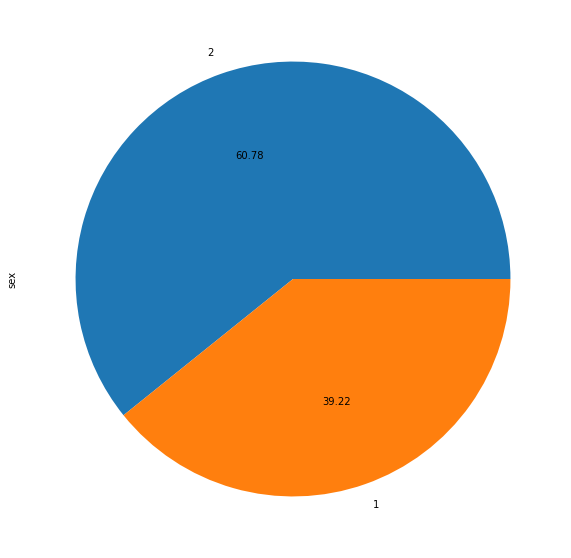

In [9]:
data['sex'].value_counts().plot(kind='pie', figsize=(10,10), autopct='%.2f')

berdasarkan chart diatas, diketahui bahwa jumlah pengguna kredit card ini 60,78% merupakan gender denggan kode 1 dan sebanyak 39.22 % merupakan  gender dengan kode 2.

<AxesSubplot:xlabel='education_level'>

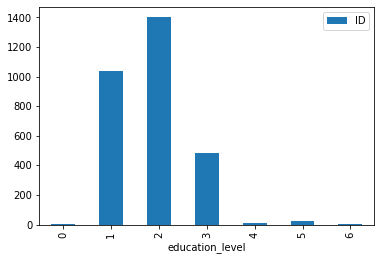

In [10]:
data.groupby('education_level')[['ID']].count().plot (kind = 'bar')

berdasarkan grafik diatas, pengguna paling banyak ialah pengguna dengan level edukasi 2. jika 0 adalah SMP, mungkin kode 2 ini adalah D3/S1 yang mana telah disiapkan untuk bekerja sehingga mereka sudah bisa memiliki kartu kredit untuk mempermudah transaksinya.

In [11]:
# melihat semua pengguna berdasarkan limit balance nya
data.groupby('limit_balance')[['ID']].count()

,ID
limit_balance,
10000.0,46
20000.0,203
30000.0,148
40000.0,26
50000.0,348
60000.0,68
70000.0,76
80000.0,145
90000.0,71


In [12]:
data['limit_balance'].describe()

count      2965.000000
mean     163369.308600
std      125030.415472
min       10000.000000
25%       50000.000000
50%      140000.000000
75%      230000.000000
max      800000.000000
Name: limit_balance, dtype: float64

berdasarkan limit transaksi, paling banyak pengguna memiliki limit 50000 sedangkan jumlah pengguna dengan limit diatas 500000 sangat sedikit jumlahnya. kemungkinan, penyedia layanan ini memfokuskan layanan untuk warga dengan kemampuan tersebut yaitu limit yang kecil dan menengah walaupun limit yg keecil jumlahnya lebih banyak

<AxesSubplot:>

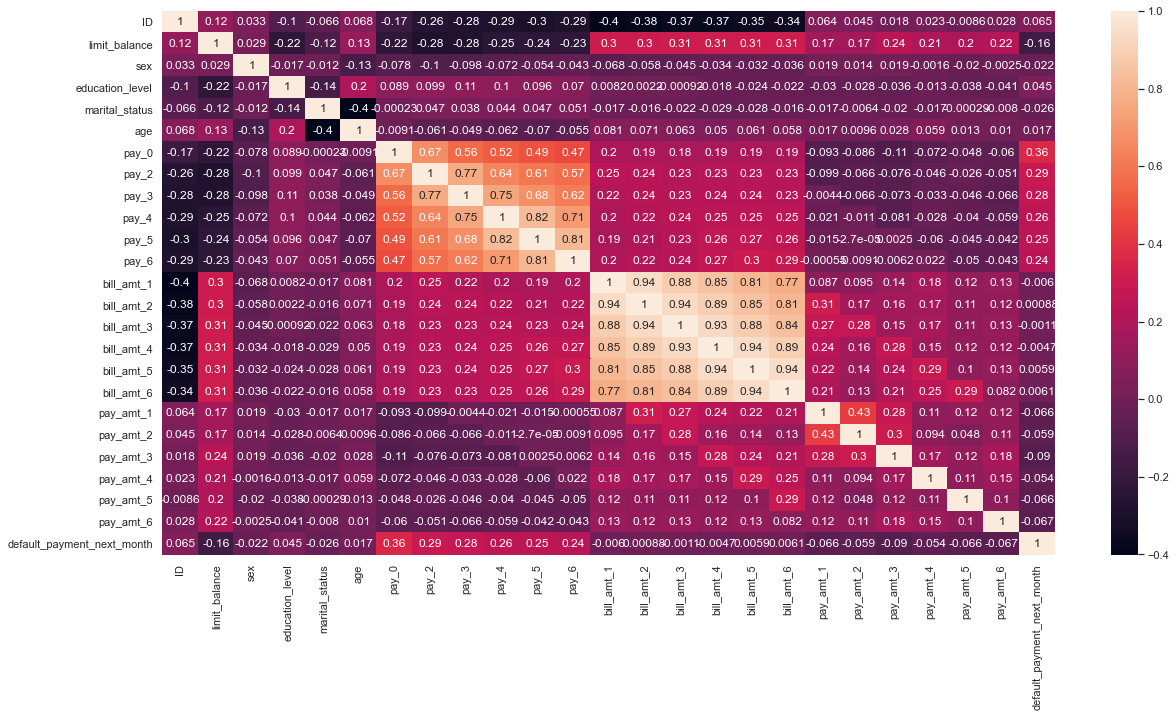

In [13]:
sns.set(rc = {'figure.figsize':(20,10)})
sns.heatmap(data.corr(),annot=True)

Gambar diatas menunjukkan korelasi antara fitur atau kolom dari tabel dataset. semakin mendekati angka 1 maka korelasi yang terbentuk semakin tinggi. kita ambil contoh ingin melihat korelasi pay_0 terhadap default payment next month. pada sumbu x kita lihat pay_0 dan pada sumbu y kita default paymrntnya. ternyata angka yang terlihat ialah 0.36. artinya pay_0 ini memiliki korelasi yang cukup besar terhapa default payment nantinya. 

## Data preprocessing

In [14]:
# copy data terlebih dahulu

datacopy = data.copy()
datacopy.head()

,ID,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,0,50000.0,1,1,2,39.0,0.0,0.0,0.0,0.0,...,50803.0,30789.0,15874.0,1800.0,2000.0,3000.0,2000.0,2000.0,2000.0,0
1,1,110000.0,2,1,2,29.0,0.0,0.0,0.0,0.0,...,32489.0,26354.0,20221.0,2000.0,2010.0,3000.0,3000.0,3000.0,1000.0,0
2,2,270000.0,1,1,2,36.0,0.0,0.0,0.0,2.0,...,40335.0,37165.0,22156.0,10076.0,4018.0,14.0,2051.0,2000.0,0.0,0
3,3,130000.0,1,1,1,45.0,0.0,0.0,0.0,0.0,...,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0,0
4,4,50000.0,1,1,2,24.0,0.0,0.0,0.0,0.0,...,19837.0,19855.0,20151.0,1367.0,1606.0,692.0,709.0,721.0,692.0,0


In [15]:
# drop kolom ID karena sudah tidak digunakan

datacopy.drop(columns='ID', inplace= True)


In [16]:
datacopy.head()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,50000.0,1,1,2,39.0,0.0,0.0,0.0,0.0,0,...,50803.0,30789.0,15874.0,1800.0,2000.0,3000.0,2000.0,2000.0,2000.0,0
1,110000.0,2,1,2,29.0,0.0,0.0,0.0,0.0,0,...,32489.0,26354.0,20221.0,2000.0,2010.0,3000.0,3000.0,3000.0,1000.0,0
2,270000.0,1,1,2,36.0,0.0,0.0,0.0,2.0,0,...,40335.0,37165.0,22156.0,10076.0,4018.0,14.0,2051.0,2000.0,0.0,0
3,130000.0,1,1,1,45.0,0.0,0.0,0.0,0.0,0,...,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0,0
4,50000.0,1,1,2,24.0,0.0,0.0,0.0,0.0,0,...,19837.0,19855.0,20151.0,1367.0,1606.0,692.0,709.0,721.0,692.0,0


In [17]:
# cek info data
datacopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   limit_balance               2965 non-null   float64
 1   sex                         2965 non-null   int64  
 2   education_level             2965 non-null   int64  
 3   marital_status              2965 non-null   int64  
 4   age                         2965 non-null   float64
 5   pay_0                       2965 non-null   float64
 6   pay_2                       2965 non-null   float64
 7   pay_3                       2965 non-null   float64
 8   pay_4                       2965 non-null   float64
 9   pay_5                       2965 non-null   int64  
 10  pay_6                       2965 non-null   int64  
 11  bill_amt_1                  2965 non-null   float64
 12  bill_amt_2                  2965 non-null   float64
 13  bill_amt_3                  2965 

untuk kolom sex, education_level, dan marital status dirasa lebih cocok jika mengubah data kedalam type object saja karena angka pada kolom tersebut menunjukkan kode atau bisa disebut kategorikal

In [18]:
datacopy[['sex','education_level','marital_status']]= datacopy[['sex','education_level','marital_status']].astype('object')

In [19]:
datacopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   limit_balance               2965 non-null   float64
 1   sex                         2965 non-null   object 
 2   education_level             2965 non-null   object 
 3   marital_status              2965 non-null   object 
 4   age                         2965 non-null   float64
 5   pay_0                       2965 non-null   float64
 6   pay_2                       2965 non-null   float64
 7   pay_3                       2965 non-null   float64
 8   pay_4                       2965 non-null   float64
 9   pay_5                       2965 non-null   int64  
 10  pay_6                       2965 non-null   int64  
 11  bill_amt_1                  2965 non-null   float64
 12  bill_amt_2                  2965 non-null   float64
 13  bill_amt_3                  2965 

terlihat telah terganti dtypes nya

In [20]:
# cek missing values

datacopy.isnull().sum()

limit_balance                 0
sex                           0
education_level               0
marital_status                0
age                           0
pay_0                         0
pay_2                         0
pay_3                         0
pay_4                         0
pay_5                         0
pay_6                         0
bill_amt_1                    0
bill_amt_2                    0
bill_amt_3                    0
bill_amt_4                    0
bill_amt_5                    0
bill_amt_6                    0
pay_amt_1                     0
pay_amt_2                     0
pay_amt_3                     0
pay_amt_4                     0
pay_amt_5                     0
pay_amt_6                     0
default_payment_next_month    0
dtype: int64

tidak ada data yang missing pada dataset ini

### data inference

In [21]:
# membuat data inference
data_inf = datacopy.sample(10, random_state=42)
data_inf

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
2882,160000.0,2,1,2,32.0,-1.0,-1.0,-1.0,-1.0,-1,...,3181.0,4998.0,1250.0,5726.0,5037.0,3182.0,5000.0,1252.0,749.0,0
2071,20000.0,1,3,1,29.0,1.0,-2.0,-2.0,-2.0,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2725,150000.0,2,1,2,33.0,0.0,-1.0,-1.0,-1.0,-1,...,1141.0,1067.0,1128.0,237.0,1426.0,1141.0,1067.0,1200.0,1150.0,0
1684,100000.0,1,2,1,46.0,2.0,2.0,2.0,0.0,0,...,18036.0,18446.0,18840.0,1300.0,0.0,700.0,700.0,700.0,800.0,1
2691,140000.0,2,1,2,34.0,-1.0,-1.0,-2.0,-2.0,-1,...,0.0,6400.0,11400.0,0.0,0.0,0.0,6400.0,5000.0,1000.0,0
1419,50000.0,2,2,1,34.0,0.0,0.0,0.0,0.0,2,...,7592.0,1582.0,1099.0,1538.0,1575.0,1582.0,593.0,242.0,17012.0,0
1323,120000.0,2,2,2,27.0,0.0,0.0,0.0,0.0,0,...,20129.0,10388.0,13316.0,1137.0,1514.0,1069.0,278.0,3000.0,0.0,1
810,40000.0,2,2,1,25.0,0.0,0.0,0.0,0.0,0,...,39380.0,41389.0,40628.0,1950.0,4300.0,2000.0,2938.0,0.0,3700.0,1
1672,180000.0,2,2,1,38.0,-1.0,2.0,2.0,-1.0,0,...,8941.0,5181.0,5181.0,0.0,0.0,8941.0,0.0,0.0,0.0,1
332,50000.0,2,1,2,25.0,0.0,0.0,0.0,0.0,0,...,40345.0,31003.0,29693.0,1870.0,2500.0,3017.0,1060.0,1300.0,2000.0,0


In [22]:
# menghilangkan data inferencec pada data secara keseluruhan

data_train_test= datacopy.drop(data_inf.index)
data_train_test

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,50000.0,1,1,2,39.0,0.0,0.0,0.0,0.0,0,...,50803.0,30789.0,15874.0,1800.0,2000.0,3000.0,2000.0,2000.0,2000.0,0
1,110000.0,2,1,2,29.0,0.0,0.0,0.0,0.0,0,...,32489.0,26354.0,20221.0,2000.0,2010.0,3000.0,3000.0,3000.0,1000.0,0
2,270000.0,1,1,2,36.0,0.0,0.0,0.0,2.0,0,...,40335.0,37165.0,22156.0,10076.0,4018.0,14.0,2051.0,2000.0,0.0,0
3,130000.0,1,1,1,45.0,0.0,0.0,0.0,0.0,0,...,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0,0
4,50000.0,1,1,2,24.0,0.0,0.0,0.0,0.0,0,...,19837.0,19855.0,20151.0,1367.0,1606.0,692.0,709.0,721.0,692.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,210000.0,2,2,1,39.0,-1.0,-1.0,-1.0,-1.0,-2,...,0.0,0.0,12000.0,0.0,28428.0,0.0,0.0,12000.0,33664.0,0
2961,280000.0,2,1,1,41.0,2.0,-1.0,-1.0,-1.0,-2,...,0.0,0.0,244.0,6859.0,486.0,0.0,0.0,244.0,0.0,0
2962,80000.0,1,1,2,28.0,1.0,-1.0,-1.0,-1.0,-2,...,0.0,0.0,0.0,47.0,207.0,0.0,0.0,0.0,0.0,0
2963,200000.0,1,2,1,53.0,1.0,-1.0,-1.0,-2.0,-2,...,0.0,0.0,6753.0,2920.0,0.0,0.0,0.0,6753.0,0.0,1


In [23]:
# reset index

data_train_test.reset_index(drop= True, inplace=True)
data_inf.reset_index(drop=True, inplace = True)

### Splitting dataset

In [24]:
# split between X dan y

X = data_train_test.drop(['default_payment_next_month'], axis = 1)
y= data_train_test['default_payment_next_month']

In [25]:
# split train-set and test-set


X_train,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=42)

print('train size:', X_train.shape)
print('test size:', X_test.shape)

train size: (2364, 23)
test size: (591, 23)


## HANDLING OUTLIER

### Identifikasi distribusi data berdasarkan feature

In [26]:
# Function to create histogram and boxplot.

def cek_distribusi(X_train, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(X_train[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=X_train[variable])
    plt.title('Boxplot')

    plt.show()

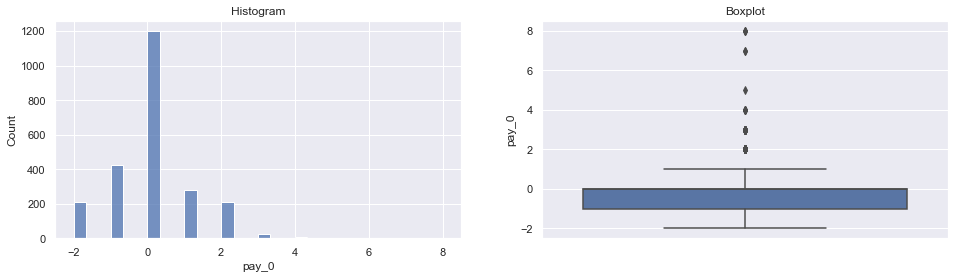

In [27]:
cek_distribusi(X_train,'pay_0')

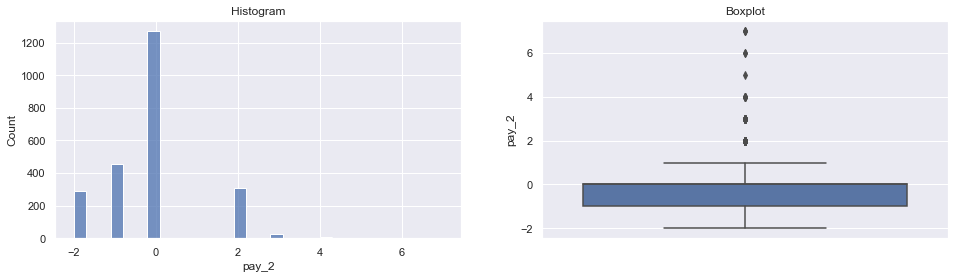

In [28]:
cek_distribusi(X_train,'pay_2')

In [29]:
X_train.skew()

limit_balance       0.982132
sex                -0.436707
education_level     0.916729
marital_status     -0.045848
age                 0.781186
pay_0               0.945086
pay_2               0.878682
pay_3               0.918844
pay_4               1.145222
pay_5               1.101837
pay_6               1.011432
bill_amt_1          2.513715
bill_amt_2          2.482645
bill_amt_3          2.608422
bill_amt_4          2.488481
bill_amt_5          2.451462
bill_amt_6          2.492457
pay_amt_1          12.145990
pay_amt_2          27.757224
pay_amt_3           8.406200
pay_amt_4           8.250806
pay_amt_5          11.889873
pay_amt_6          10.063480
dtype: float64

definisi skew ialah nilai kolom yang lebih dari 0.5 ataupun kurang dari -0.5. jadi data normal merupakan data dengan tingkat skewness -0.5 hingga 0.5

In [30]:
# mendefinisikan mana kolom yang berisi number maupun categorical
num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()

print ('Kolom yang merupakan number adalah: ',num_columns)

print ('\n Kolom yang merupakan categorical adalah: ',cat_columns)

Kolom yang merupakan number adalah:  ['limit_balance', 'age', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']

 Kolom yang merupakan categorical adalah:  ['sex', 'education_level', 'marital_status']


In [31]:
# buat variabel baru untuk kategorikal dan numerik

X_train_num = X_train[num_columns]
X_train_cat = X_train[cat_columns]

X_test_num = X_test[num_columns]
X_test_cat = X_test[cat_columns]

kita akan melakukan normalisasi data dengan winsoriser untuk melimitasi outlier yang terjadi serta agar kita tidak terlalu kehilangan banyak data.

In [33]:
# Create the capper

windsoriser = Winsorizer(capping_method='iqr', 
                          tail='both',
                          fold=1.5,
                          variables=['bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6'])

windsoriser.fit(X_train_num)


Winsorizer(capping_method='iqr', fold=1.5, tail='both',
           variables=['bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4',
                      'bill_amt_5', 'bill_amt_6', 'pay_amt_1', 'pay_amt_2',
                      'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6'])

In [34]:
X_train_num = windsoriser.transform(X_train_num)

## FEATURE SELECTION


In [35]:
# mendefinisikan mana kolom yang berisi number maupun categorical
num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()

print ('Kolom yang merupakan number adalah: ',num_columns)

print ('\n Kolom yang merupakan categorical adalah: ',cat_columns)

Kolom yang merupakan number adalah:  ['limit_balance', 'age', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']

 Kolom yang merupakan categorical adalah:  ['sex', 'education_level', 'marital_status']


In [36]:
# buat variabel baru untuk kategorikal dan numerik

X_train_num = X_train[num_columns]
X_train_cat = X_train[cat_columns]

X_test_num = X_test[num_columns]
X_test_cat = X_test[cat_columns]

## FEATURE SCALING

In [37]:
X_train_num.skew()

limit_balance     0.982132
age               0.781186
pay_0             0.945086
pay_2             0.878682
pay_3             0.918844
pay_4             1.145222
pay_5             1.101837
pay_6             1.011432
bill_amt_1        2.513715
bill_amt_2        2.482645
bill_amt_3        2.608422
bill_amt_4        2.488481
bill_amt_5        2.451462
bill_amt_6        2.492457
pay_amt_1        12.145990
pay_amt_2        27.757224
pay_amt_3         8.406200
pay_amt_4         8.250806
pay_amt_5        11.889873
pay_amt_6        10.063480
dtype: float64

In [38]:
# pisahkan data numerik terhadap sacalernya

X_train_num_std = X_train_num[['pay_0','pay_2', 'pay_3','pay_4','pay_5', 'pay_6']]
X_train_num_MM = X_train_num[['limit_balance', 'age', 'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']]

X_test_num_std = X_test_num[['pay_0','pay_2', 'pay_3','pay_4','pay_5', 'pay_6']]
X_test_num_MM = X_test_num[['limit_balance', 'age', 'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']]

In [39]:
# feature scaling

scalerstd = StandardScaler()
scalerMM = MinMaxScaler()

# lakukan fit scaling untuk tiap data yg skew dan normal
scalerMM.fit(X_train_num_MM)
scalerstd.fit(X_train_num_std)

# lakukan transform scaling untuk tiap data yg skew dan normal
X_test_num_scaledstd = scalerstd.transform(X_test_num_std)
X_test_num_scaledMM = scalerMM.transform(X_test_num_MM)

X_train_num_scaledstd = scalerstd.transform(X_train_num_std)
X_train_num_scaledMM = scalerMM.transform(X_train_num_MM)

In [40]:
# concat data numerik

X_train_scaled = np.concatenate([X_train_num_scaledstd, X_train_num_scaledMM], axis = 1)
X_test_scaled = np.concatenate([X_test_num_scaledstd, X_test_num_scaledMM], axis =1)

## FEATURE ENCODING

In [41]:
# cek data kategorikal

X_train_cat.head(10)

,sex,education_level,marital_status
1364,1,1,2
1735,1,2,2
879,2,2,1
2325,2,2,1
2863,1,1,1
358,1,2,1
1637,2,1,2
1714,2,2,2
259,2,3,0
1225,2,3,1


gunakan encoder sesuai fungsinya. untuk data yg ordinal, kita gunakan ordinal encoder dan sisanya akan menggunakan onehotencoder

In [42]:
# pisahkan data kategorikal terhadap encodernya

X_train_cat_OHE = X_train_cat[["sex","marital_status"]]
X_train_cat_ORD = X_train_cat[["education_level"]]

X_test_cat_OHE = X_test_cat[["sex","marital_status"]]
X_test_cat_ORD = X_test_cat[["education_level"]]

In [43]:
# feature scaling

encoderOHE = OneHotEncoder()
encoderORD = OrdinalEncoder()

# lakukan fit encoding untuk tiap data
encoderOHE.fit(X_train_cat_OHE)
encoderORD.fit(X_train_cat_ORD)

# lakukan transform encoding untuk tiap data
X_test_cat_encoded_OHE = encoderOHE.transform(X_test_cat_OHE).toarray()
X_test_cat_encoded_ORD = encoderORD.transform(X_test_cat_ORD)

X_train_cat_encoded_OHE = encoderOHE.transform(X_train_cat_OHE).toarray()
X_train_cat_encoded_ORD = encoderORD.transform(X_train_cat_ORD)

In [45]:
# concat data kategorikal

X_train_encoded = np.concatenate([X_train_cat_encoded_OHE, X_train_cat_encoded_ORD], axis = 1)
X_test_encoded = np.concatenate([X_test_cat_encoded_OHE, X_test_cat_encoded_ORD], axis =1)

In [46]:
# concate columns semuanya cat dan num

X_train_final = np.concatenate([X_train_scaled, X_train_encoded], axis = 1)
X_test_final = np.concatenate([X_test_scaled, X_test_encoded], axis =1)

## MODEL DEFINITION

In [47]:
# definisikan model

model_log_reg = LogisticRegression(solver="lbfgs", random_state=31)
model_SVM = SVC(gamma = 'auto')
model_DC = DecisionTreeClassifier() 
model_RF = RandomForestClassifier()
model_knn = KNeighborsClassifier()
model_NB = GaussianNB()
model_VC = VotingClassifier(estimators=[('lr', model_log_reg), ('rf', model_RF)],
    voting='hard')

## MODEL TRAINING

In [48]:
# training semua model

model_log_reg.fit(X_train_final,y_train)
model_SVM.fit(X_train_final,y_train)
model_DC.fit(X_train_final,y_train)
model_RF.fit(X_train_final,y_train)
model_knn.fit(X_train_final,y_train)
model_NB.fit(X_train_final,y_train)
model_VC.fit(X_train_final,y_train)

c:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=31)),
                             ('rf', RandomForestClassifier())])

## MODEL EVALUATION

In [49]:
for model in (model_log_reg,model_SVM,model_DC,model_RF,model_knn,model_NB,model_VC):
    model.fit(X_train_final, y_train)
    y_pred = model.predict(X_test_final)
    print(model.__class__.__name__, accuracy_score(y_test, y_pred))

c:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression 0.8189509306260575
SVC 0.8426395939086294
DecisionTreeClassifier 0.7360406091370558
RandomForestClassifier 0.8341793570219966
KNeighborsClassifier 0.8223350253807107
GaussianNB 0.33671742808798644


c:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier 0.8189509306260575


berdasarkan akurasi skornya, untuk model tiap model mendapatkan nilaui sebagai berikut:
1. LogisticRegression 0.8189509306260575
2. SVC 0.8426395939086294
3. DecisionTreeClassifier 0.7360406091370558
4. RandomForestClassifier 0.8358714043993232
5. KNeighborsClassifier 0.8223350253807107
6. GaussianNB 0.33671742808798644
7. VotingClassifier 0.817258883248731

skor tertinggi ialah dengan pemodelan SVC dengan nilai 0.842 dan pemodelan dengan nilai terendahnya ialah model naive bayes dengan skor 0.336. semua pemodelan ini belum mendapatkan penyesuaian hyperparameter.

In [50]:
# menggunakan crossvalidation score untuk tiap model

for model in (model_log_reg,model_SVM,model_DC,model_RF,model_knn,model_NB,model_VC):
    model.fit(X_train_final, y_train)
    print(model.__class__.__name__, cross_val_score(model,X_test,y_test,cv=5))

c:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

LogisticRegression [0.77310924 0.76271186 0.75423729 0.74576271 0.77966102]
SVC [0.76470588 0.76271186 0.77966102 0.77966102 0.77118644]
DecisionTreeClassifier [0.74789916 0.77966102 0.77118644 0.81355932 0.79661017]
RandomForestClassifier [0.86554622 0.88135593 0.81355932 0.81355932 0.80508475]
KNeighborsClassifier [0.73109244 0.72033898 0.77966102 0.73728814 0.73728814]
GaussianNB [0.41176471 0.41525424 0.45762712 0.43220339 0.37288136]


c:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

VotingClassifier [0.77310924 0.77118644 0.77118644 0.76271186 0.77966102]


In [51]:
print(cross_val_score(model_log_reg,X_test,y_test, cv=5).mean())
print(cross_val_score(model_log_reg,X_test,y_test, cv=5).std())

c:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

0.7630964250106822
0.01227788294951293


c:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

In [52]:
# hasil mean dan std dari model SVC
print(cross_val_score(model_SVM,X_test,y_test, cv=5).mean())
print(cross_val_score(model_SVM,X_test,y_test, cv=5).std())

0.7715852442671984
0.007164603877655738


In [53]:
# hasil mean dan std dari model decision tree
print(f'nilai mean: {cross_val_score(model_DC,X_test,y_test, cv=5).mean()}')
print(f'nilai std: {cross_val_score(model_DC,X_test,y_test, cv=5).std()}')

nilai mean: 0.7580686511892892
nilai std: 0.014651456548081615


In [54]:
# hasil mean dan std dari model randomforest
print(f'nilai mean: {cross_val_score(model_RF,X_test,y_test, cv=5).mean()}')
print(f'nilai std: {cross_val_score(model_RF,X_test,y_test, cv=5).std()}')

nilai mean: 0.8442671984047856
nilai std: 0.021040577527239524


In [55]:
# hasil mean dan std dari model knn
print(f'nilai mean: {cross_val_score(model_knn,X_test,y_test, cv=5).mean()}')
print(f'nilai std: {cross_val_score(model_knn,X_test,y_test, cv=5).std()}')

nilai mean: 0.7411337416322462
nilai std: 0.02023451555457654


In [56]:
# hasil mean dan std dari model naive bayes
print(f'nilai mean: {cross_val_score(model_NB,X_test,y_test, cv=5).mean()}')
print(f'nilai std: {cross_val_score(model_NB,X_test,y_test, cv=5).std()}')

nilai mean: 0.4179461615154536
nilai std: 0.027763791059278172


In [57]:
# hasil mean dan std dari model voting classifier
print(f'nilai mean: {cross_val_score(model_VC,X_test,y_test, cv=5).mean()}')
print(f'nilai std: {cross_val_score(model_VC,X_test,y_test, cv=5).std()}')

c:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

nilai mean: 0.7715710012818687


c:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

nilai std: 0.005414695247450072


diketahui bahwa dengan fungsi cross validation score, nilai yang didapatkan dari tiap model:

1. LogisticRegression [0.77310924 0.76271186 0.75423729 0.74576271 0.77966102]
2. SVC [0.76470588 0.76271186 0.77966102 0.77966102 0.77118644]
3. DecisionTreeClassifier [0.74789916 0.73728814 0.76271186 0.76271186 0.75423729]
4. RandomForestClassifier [0.85714286 0.88983051 0.83050847 0.83050847 0.8220339 ]
5. KNeighborsClassifier [0.73109244 0.72033898 0.77966102 0.73728814 0.73728814]
6. GaussianNB [0.41176471 0.41525424 0.45762712 0.43220339 0.37288136]
7. VotingClassifier [0.77310924 0.77118644 0.77118644 0.76271186 0.77966102]

nilai yang muncul dari tiap model ini merupakan rentang sehingga kita ambil contoh untuk votingclassifier, rentang skor yang dihasilkan ialah antara 0,762 hingga 0,779.

hasil evaluasi:

model dengan akurasi skor diatas 0,8 seperti logreg, SVC, RF, knn, dan VC dirasa cukup baik sebagai model prediksi default_payment. kemudian untuk model yang nilainya miash dibawah 0.8 seperti Decisiontree mungkin dibutuhkan perbaikan sehingga bisa layak untuk digunakan dalam prediksi. model NB merupakan model yang skornya paling rendah dan dirasa tidak bisa dijadikan model untuk melakukan prediksi default payment.

berdasarkan cross validation, ada nilai yang berbeda dengan akurasi skornya. misalnya pada logreg diketahui bahwa akurasi skornya 0.8189 dan hasil cross validation memiliki rentang 0.745 hingga 0.779 dimana nilai akurasi skornya tidak masuk kedalam rentang ini. namun ada juga model yang akurasi skornya sesuaid dengan rentang dari hasil cross validation ini.


## Hyperparameter tuning

untuk melakukan tuning ini didasarkan pada 2 parameter dan 2 nilai sehingga akan terdapat 4 kombinasi. kemudian hasil best parameter akan ditampilkan pada kolom outputnya.

In [58]:
# definikan parameter yang akan dicoba pada logisticregression
param_grid_logreg = {"C": [1.0,2.0],
              "solver": ["lbfgs","liblinear"]
              }

grid_cv_logreg = GridSearchCV(model_log_reg, param_grid_logreg, cv=5)

# fit parameter kedalam data
grid_cv_logreg.fit(X_train_final,y_train)

# print hasil untuk best score untuk logreg
print("Best Score untuk model logreg:{}".format(grid_cv_logreg.best_score_))
print("Best Hyperparameters untuk logreg:\n{}".format(grid_cv_logreg.best_params_))

c:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

Best Score untuk model logreg:0.8248763751030207
Best Hyperparameters untuk logreg:
{'C': 1.0, 'solver': 'liblinear'}


c:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [59]:
# definikan parameter yang akan dicoba pada SVM
param_grid_SVM = {"kernel": ["linear","rbf"],
              "gamma": ["scale","auto"]
              }

grid_cv_SVM = GridSearchCV(model_SVM, param_grid_SVM, cv=5)

# fit parameter kedalam data
grid_cv_SVM.fit(X_train_final,y_train)

# print hasil untuk best score untuk logreg
print("Best Score untuk model SVC:{}".format(grid_cv_SVM.best_score_))
print("Best Hyperparameters untuk SVC:\n{}".format(grid_cv_SVM.best_params_))

Best Score untuk model SVC:0.8341831798473501
Best Hyperparameters untuk SVC:
{'gamma': 'scale', 'kernel': 'rbf'}


In [60]:
# definikan parameter yang akan dicoba pada decisiontree
param_grid_DC= {"criterion": ["gini","entropy"],
              "splitter": ["best","random"]
              }

grid_cv_DC = GridSearchCV(model_DC, param_grid_DC, cv=5)

# fit parameter kedalam data
grid_cv_DC.fit(X_train_final,y_train)

# print hasil untuk best score
print("Best Score untuk model decisiontree:{}".format(grid_cv_DC.best_score_))
print("Best Hyperparameters untuk decisiontree:\n{}".format(grid_cv_DC.best_params_))

Best Score untuk model decisiontree:0.7423863188447344
Best Hyperparameters untuk decisiontree:
{'criterion': 'gini', 'splitter': 'random'}


In [61]:
# definikan parameter yang akan dicoba pada randomforest
param_grid_RF= {"criterion": ["gini","entropy"],
              "max_depth": [10,20]
              }

grid_cv_RF = GridSearchCV(model_RF, param_grid_RF, cv=5)

# fit parameter kedalam data
grid_cv_RF.fit(X_train_final,y_train)

# print hasil untuk best score
print("Best Score untuk model randomforest:{}".format(grid_cv_RF.best_score_))
print("Best Hyperparameters untuk randomforest:\n{}".format(grid_cv_RF.best_params_))

Best Score untuk model randomforest:0.8308014118321569
Best Hyperparameters untuk randomforest:
{'criterion': 'entropy', 'max_depth': 10}


In [62]:
# definikan parameter yang akan dicoba pada knn
k_range = range(1, 31)
param_grid_knn= {"n_neighbors": k_range,
              "algorithm": ["auto","kd_tree"]
              }

grid_cv_knn = GridSearchCV(model_knn, param_grid_knn, cv=5)

# fit parameter kedalam data
grid_cv_knn.fit(X_train_final,y_train)

# print hasil untuk best score
print("Best Score untuk model knn:{}".format(grid_cv_knn.best_score_))
print("Best Hyperparameters untuk knn:\n{}".format(grid_cv_knn.best_params_))

Best Score untuk model knn:0.8303767871860106
Best Hyperparameters untuk knn:
{'algorithm': 'auto', 'n_neighbors': 25}


In [ ]:
param_grid_VC= {"voting": ["hard","soft"]}

grid_cv_VC = GridSearchCV(model_VC, param_grid_VC, cv=5)

# fit parameter kedalam data
grid_cv_VC.fit(X_train_final,y_train)

# print hasil untuk best score
print("Best Score untuk model VC:{}".format(grid_cv_VC.best_score_))
print("Best Hyperparameters untuk VC:\n{}".format(grid_cv_VC.best_params_))

c:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

Best Score untuk model VC:0.8308005159995699
Best Hyperparameters untuk VC:
{'voting': 'soft'}


berdasarkan data diatas diketahui parameter2 yang paling baik digunakan untuk masing-masing model

1. Best Score untuk model VC:0.8308005159995699
    
    Best Hyperparameters untuk VC: {'voting': 'soft'}

    **peningkatan: ada, dari 0.817 menjadi 0.831**

2. Best Score untuk model knn:0.8303767871860106
    
    Best Hyperparameters untuk knn: {'algorithm': 'auto', 'n_neighbors': 25}

    **peningkatan: tidak, dari 0.822 menjadi 0.830**

3. Best Score untuk model randomforest:0.0.8308014118321569
    
    Best Hyperparameters untuk randomforest: {'criterion': 'entropy', 'max_depth': 10}

    **peningkatan: tidak, dari 0,835 menjadi 0,83**

4. Best Score untuk model decisiontree:0.7423872146773212
    
    Best Hyperparameters untuk decisiontree: {'criterion': 'gini', 'splitter': 'random'}

    **peningkatan: ada, dari 0.736 menjadi 0,742**

5. Best Score untuk model SVC:0.8341831798473501
    
    Best Hyperparameters untuk SVC: {'gamma': 'scale', 'kernel': 'rbf'}

    **peningkatan: tidak, dari 0.842 menjadi 0.834**

6. Best Score untuk model logreg:0.8248763751030207
    
    Best Hyperparameters untuk logreg: {'C': 1.0, 'solver': 'liblinear'}

    **peningkatan: ada, dari 0.818 menjadi 0.814**



## MODEL INFERENCE

In [63]:
# split data
data_inf_num = data_inf[num_columns]
data_inf_cat = data_inf[cat_columns]

In [64]:
# feature scaling 
data_inf_num_std = data_inf_num[['pay_0','pay_2', 'pay_3','pay_4','pay_5', 'pay_6']]
data_inf_num_MM = data_inf_num[['limit_balance', 'age', 'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']]

scalerstd = StandardScaler()
scalerMM = MinMaxScaler()

# lakukan fit encoding untuk tiap data
scalerMM.fit(X_train_num_MM)
scalerstd.fit(X_train_num_std)

# lakukan transform scaling untuk tiap data
data_inf_num_scaledstd = scalerstd.transform(data_inf_num_std)
data_inf_num_scaledMM = scalerMM.transform(data_inf_num_MM)

data_inf_scaled = np.concatenate([data_inf_num_scaledstd, data_inf_num_scaledMM], axis = 1)

In [65]:
# feature encoding

# pisahkan data kategorikal terhadap encodernya

data_inf_cat_OHE = data_inf_cat[["sex","marital_status"]]
data_inf_cat_ORD = data_inf_cat[["education_level"]]


encoderOHE = OneHotEncoder()
encoderORD = OrdinalEncoder()

# lakukan fit encoding untuk tiap data
encoderOHE.fit(X_train_cat_OHE)
encoderORD.fit(X_train_cat_ORD)

# lakukan transform encoding untuk tiap data
data_inf_cat_encoded_OHE = encoderOHE.transform(data_inf_cat_OHE).toarray()
data_inf_cat_encoded_ORD = encoderORD.transform(data_inf_cat_ORD)

# concat data kategorikal

data_inf_encoded = np.concatenate([data_inf_cat_encoded_OHE, data_inf_cat_encoded_ORD], axis = 1)

In [66]:
# concate the data

data_inf_final = np.concatenate([data_inf_scaled, data_inf_encoded], axis = 1)

In [67]:
# predict data inference

y_pred_inf_logreg = model_log_reg.predict(data_inf_final)
y_pred_inf_SVM = model_SVM.predict(data_inf_final)
y_pred_inf_DC= model_DC.predict(data_inf_final)
y_pred_inf_RF= model_RF.predict(data_inf_final)
y_pred_inf_knn= model_knn.predict(data_inf_final)
y_pred_inf_NB= model_NB.predict(data_inf_final)
y_pred_inf_VC= model_VC.predict(data_inf_final)

In [68]:
# konversi data kedalam dataframe

y_pred_inf_df_logreg = pd.DataFrame(y_pred_inf_logreg, columns = ['default_payment_next_montht Prediction with logreg'])
y_pred_inf_df_svm= pd.DataFrame(y_pred_inf_SVM, columns = ['default_payment_next_month Prediction with SVM'])
y_pred_inf_df_DC = pd.DataFrame(y_pred_inf_DC, columns = ['default_payment_next_month Prediction with DC'])
y_pred_inf_df_RF= pd.DataFrame(y_pred_inf_RF, columns = ['default_payment_next_month Prediction with RF'])
y_pred_inf_df_knn= pd.DataFrame(y_pred_inf_knn, columns = ['default_payment_next_month Prediction with knn'])
y_pred_inf_df_NB= pd.DataFrame(y_pred_inf_NB, columns = ['default_payment_next_month Prediction with NB'])
y_pred_inf_df_VC= pd.DataFrame(y_pred_inf_VC, columns = ['default_payment_next_month Prediction with VC'])

In [69]:
# concat data antar model
y_pred_inf_df = pd.concat([y_pred_inf_df_logreg, y_pred_inf_df_svm,y_pred_inf_df_DC,y_pred_inf_df_RF,y_pred_inf_df_knn,y_pred_inf_df_NB,y_pred_inf_df_VC],axis = 1)

In [70]:
y_pred_inf_df

,default_payment_next_montht Prediction with logreg,default_payment_next_month Prediction with SVM,default_payment_next_month Prediction with DC,default_payment_next_month Prediction with RF,default_payment_next_month Prediction with knn,default_payment_next_month Prediction with NB,default_payment_next_month Prediction with VC
0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0
2,0,0,0,0,0,1,0
3,1,1,1,1,0,1,1
4,0,0,0,0,0,1,0
5,0,0,0,0,0,1,0
6,0,0,1,0,0,1,0
7,0,0,0,0,0,1,0
8,0,0,1,0,1,1,0
9,0,0,0,0,0,1,0


In [71]:
# concat data sebelumnya dengaan data aslinya
pd.concat([data_inf['default_payment_next_month'],y_pred_inf_df], axis = 1)

,default_payment_next_month,default_payment_next_montht Prediction with logreg,default_payment_next_month Prediction with SVM,default_payment_next_month Prediction with DC,default_payment_next_month Prediction with RF,default_payment_next_month Prediction with knn,default_payment_next_month Prediction with NB,default_payment_next_month Prediction with VC
0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,1,0
3,1,1,1,1,1,0,1,1
4,0,0,0,0,0,0,1,0
5,0,0,0,0,0,0,1,0
6,1,0,0,1,0,0,1,0
7,1,0,0,0,0,0,1,0
8,1,0,0,1,0,1,1,0
9,0,0,0,0,0,0,1,0


## KESIMPULAN

berdasarkan hasil pemodelan menggunakan 7 jenis klasifikasi, diketahui bahwa dataset ini akan lebih baik jika menggunakan model SVC yang memiliki skor paling tinggi yaitu 0.842.

deiktahui bahwa model dengan naive bayes menjadi model yang paling rendah skornya yaitu 0.336. kemudian dengan melakukan tuning hyperparameter, diketahui bahwa terdapat skor pemodelan yang mengalami kenaikan skor namun juga ada model yg justru mengalami penurunan terhadap skornya. dengan menggunakan dataset baru atau data inference. semua model kecuali naive bayes berhasil menebak 7-8 secara benar sedangkan untuk naive bayes ini hanya menebak 1 yg benar. oleh karena itu, 6 dari 7 pemodelan ini dapat digunakan untuk memprediksi default payment namun bisa diatur sedemikian rupa sehingga akurasi dari model ini bisa lebih tinggi mendekati 100%

## CONCEPTUAL PROBLEMS

1. Apakah fungsi parameter criterion pada Decision Tree? Jelaskan salah satu criterion yang kalian pahami!
    
    Parameter yang memungkinkan untuk menentukan ukuran pemilihan atribut yang berbeda-beda. Kriteria yang didukung adalah "gini" dan "entropi". gini sendiri merupakan koefisien dari 0 hingga 1 yang menunjukkan perbedaan nilai antara data 1 dan lainnya dalam sebuah klasifikasi. perbedaan nilai ini dilihat dari besaran MSE atau varians dari data tersebut.
2. Apakah fungsi dari pruning pada Tree model?
    
    teknik kompresi data dalam M.L dan algoritma pencarian yang mengurangi ukuran decisiontree dengan menghapus bagian tree yang tidak penting dan berlebihan untuk mengklasifikasikan. pruning akan mengurangi kompleksitas pengklasifikasi akhir dan meningkatkan akurasi prediksi dengan reduksi overfitting.
3. Bagaimana cara memilih K yang optimal pada KNN?
    
    dengan melakukan sketsa plot antara nilai error dan K yang menunjukkan nilai dalam rentang yang ditentukan. Kemudian pilih nilai K yang memiliki tingkat kesalahan minimum.
4. Jelaskan apa yang kalian ketahui tentang Cross Validation!
    
    cross validation atau validasi silang adalah Teknik yang utamanya digunakan untuk melakukan prediksi model dan memperkirakan seberapa akurat sebuah model prediktif ketika dijalankan. Satu  kali proses validasi silang melibatkan pembagian sampel data ke dalam subset komplementer, melakukan analisis pada satu subset (disebut data train), dan memvalidasi analisis pada subset lainnya (disebut data test). Untuk mengurangi variabilitas, beberapa  kali proses validasi silang dilakukan dengan menggunakan partisi yang berbeda, dan hasil validasi dirata-ratakan.
5. Jelaskan apa yang kalian ketahui tentang Accuracy, Precision, Recall, F1 Score!
    
    Accuracy adalah jumlah true positives dan true negatives kemudian dibagi dengan jumlah sampel. Precision didefinisikan sebagai rasio true positive dengan jumlah false positive dan true positive. Recall didefinisikan sebagai rasio true positive dengan jumlah true positives dan false negatives. F1 adalah rata-rata dari presisi dan recall. Semakin F1 mendekati nilai 1,0 maka semakin baik kinerja model yang diharapkan. 